In [3]:
#Lando - aula de 08/08/2025 - Exercícios.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/LANDOSOUZA/inteligencia_artificial_2025/refs/heads/main/aula_3/Base%20de%20Dados/monitoramento_tempo.csv')

# Limpar espaços nos nomes de colunas e transformar todas as letras em minúsculas
df.columns = df.columns.str.strip().str.lower()



In [6]:
df.head() # Exibe as 4 primeiras linhas do dataframe

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00


In [7]:
df.tail() # Exibe as 4 útltimas linhas do dataframe

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
45248,282.00,1031.0,81.0,50.0,2.0,Terça,2017-11-29 20:00:00
45249,282.89,1030.0,71.0,330.0,1.0,Terça,2017-11-29 21:00:00
45250,283.39,1030.0,71.0,290.0,1.0,Terça,2017-11-29 22:00:00
45251,283.02,1029.0,71.0,290.0,2.0,Terça,2017-11-29 23:00:00
45252,282.28,1029.0,76.0,340.0,1.0,Quarta,2017-11-30 00:00:00


In [ ]:
# Importa a bilbioteca datetima para fazer a conversão dos dados de data de objeto para datatime
import datetime
df['data'] = pd.to_datetime(df['data']) # conversão da coluna data para datetime 64

In [9]:
df.info() # exibe as informações da base de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   temperatura          45253 non-null  float64       
 1   pressão              45253 non-null  float64       
 2   humidade             45253 non-null  float64       
 3   direção do vento     45253 non-null  float64       
 4   velocidade do vento  45253 non-null  float64       
 5   dia_da_semana        45253 non-null  object        
 6   data                 45253 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.4+ MB


In [13]:
print(df.columns.tolist())


['temperatura', 'pressão', 'humidade', 'direção do vento', 'velocidade do vento', 'dia_da_semana', 'data']


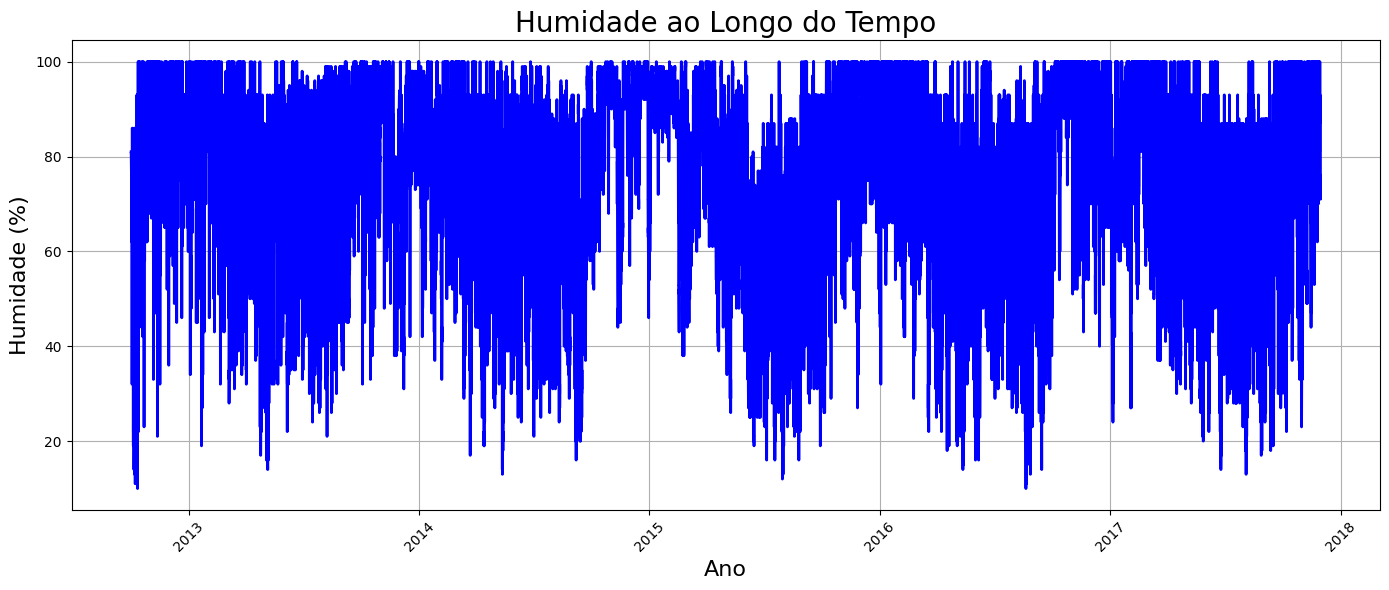

In [ ]:
# Exercício A:
# Plote o gráfico umidade x ano, colocando titulo na imagem, título dos eixos, alterando o tamanho da imagem e da fonte

import matplotlib.pyplot as plt

# Criar o gráfico
plt.figure(figsize=(14, 6))  # Tamanho da imagem
plt.plot(df['data'], df['humidade'], color='blue', linewidth=2)

# Títulos e rótulos
plt.title('Humidade ao Longo do Tempo', fontsize=20)
plt.xlabel('Ano', fontsize=16)
plt.ylabel('Humidade (%)', fontsize=16)

# Grade e layout
plt.grid(True)
plt.xticks(rotation=45)  # Rotaciona datas para melhor leitura
plt.tight_layout()
plt.show()

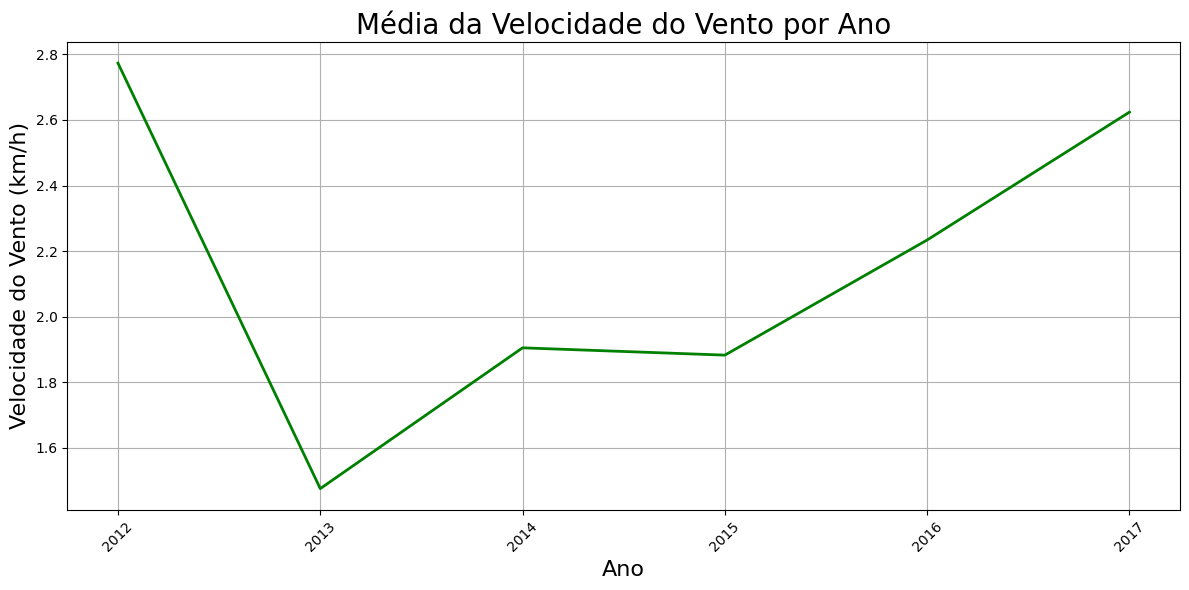

In [20]:
#Exercício B:
# Plote o gráfico velocidade do ventox ano, colocando titulo na imagem, título dos eixos, alterando o tamanho da imagem e da fonte

# Extrair o ano da coluna 'data'
df['ano'] = df['data'].dt.year

# Agrupar por ano e calcular a média da velocidade do vento
df_vento = df.groupby('ano')['velocidade do vento'].mean().reset_index()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_vento['ano'], df_vento['velocidade do vento'], color='green', linewidth=2)
plt.title('Média da Velocidade do Vento por Ano', fontsize=20)
plt.xlabel('Ano', fontsize=16)
plt.ylabel('Velocidade do Vento (km/h)', fontsize=16)
plt.grid(True)
plt.xticks(df_vento['ano'], rotation=45)
plt.tight_layout()
plt.show()


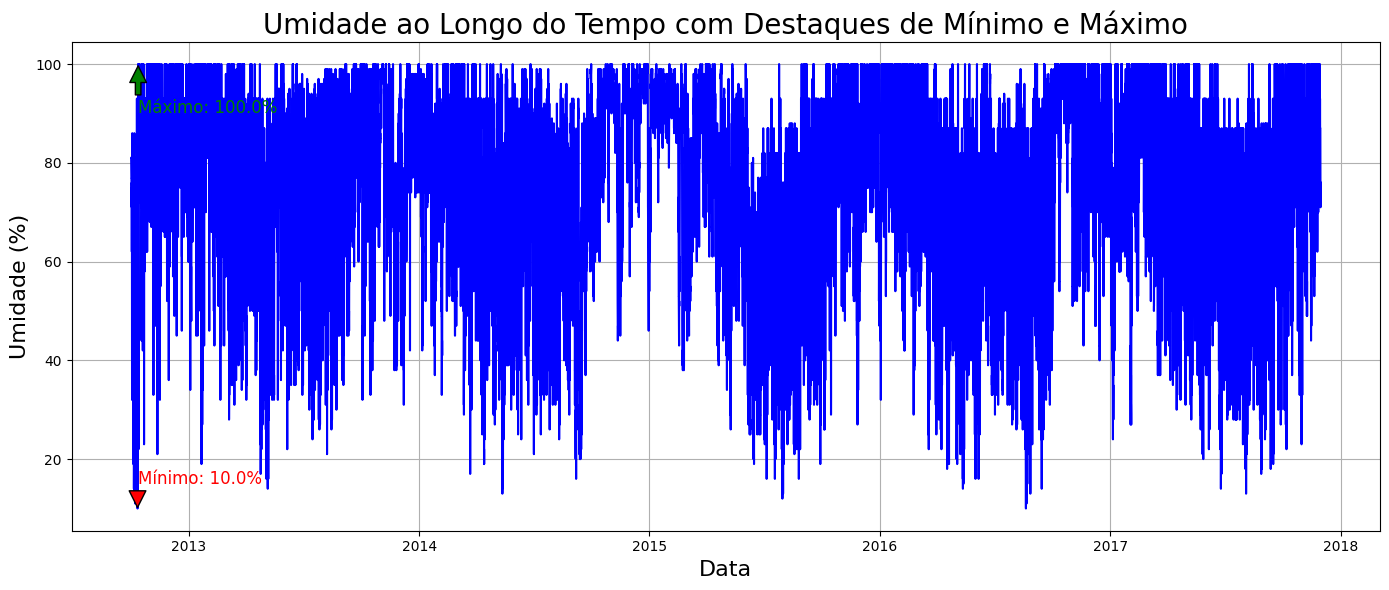

In [ ]:
#Exercício C:
#Realizar anotações no gráfico de umidade (Mín e Máx)
 
import matplotlib.pyplot as plt

# Localizar os índices dos valores mínimo e máximo
idx_min = df['humidade'].idxmin()
idx_max = df['humidade'].idxmax()

# Plotar o gráfico
plt.figure(figsize=(14, 6))
plt.plot(df['data'], df['humidade'], color='blue', linewidth=1.5)
plt.title('Umidade ao Longo do Tempo com Destaques de Mínimo e Máximo', fontsize=20)
plt.xlabel('Data', fontsize=16)
plt.ylabel('Umidade (%)', fontsize=16)
plt.grid(True)

# Anotação do valor mínimo
plt.annotate(f'Mínimo: {df["humidade"][idx_min]:.1f}%',
             xy=(df['data'][idx_min], df['humidade'][idx_min]),
             xytext=(df['data'][idx_min], df['humidade'][idx_min] + 5),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

# Anotação do valor máximo
plt.annotate(f'Máximo: {df["humidade"][idx_max]:.1f}%',
             xy=(df['data'][idx_max], df['humidade'][idx_max]),
             xytext=(df['data'][idx_max], df['humidade'][idx_max] - 10),
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=12, color='green')

plt.tight_layout()
plt.show()


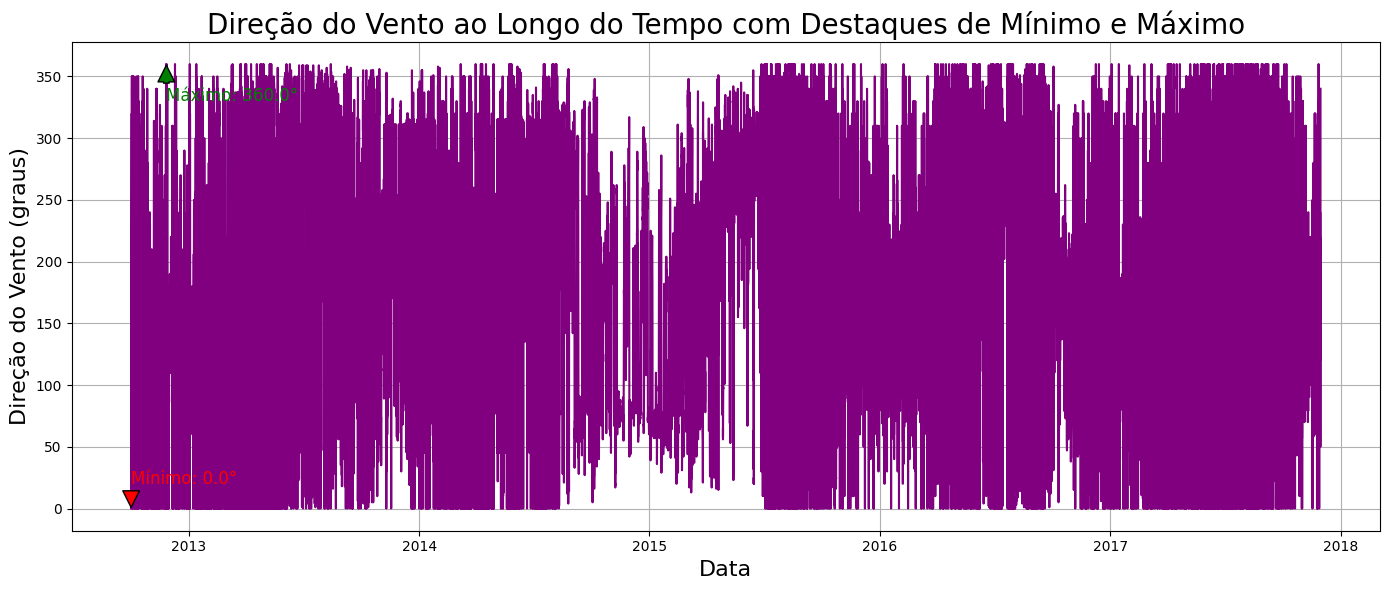

In [22]:
#Exercício D:
# Realizar anotações no gráfico de direção do vento

import matplotlib.pyplot as plt

# Localizar os índices dos valores mínimo e máximo
idx_min = df['direção do vento'].idxmin()
idx_max = df['direção do vento'].idxmax()

# Plotar o gráfico
plt.figure(figsize=(14, 6))
plt.plot(df['data'], df['direção do vento'], color='purple', linewidth=1.5)
plt.title('Direção do Vento ao Longo do Tempo com Destaques de Mínimo e Máximo', fontsize=20)
plt.xlabel('Data', fontsize=16)
plt.ylabel('Direção do Vento (graus)', fontsize=16)
plt.grid(True)

# Anotação do valor mínimo
plt.annotate(f'Mínimo: {df["direção do vento"][idx_min]:.1f}°',
             xy=(df['data'][idx_min], df['direção do vento'][idx_min]),
             xytext=(df['data'][idx_min], df['direção do vento'][idx_min] + 20),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

# Anotação do valor máximo
plt.annotate(f'Máximo: {df["direção do vento"][idx_max]:.1f}°',
             xy=(df['data'][idx_max], df['direção do vento'][idx_max]),
             xytext=(df['data'][idx_max], df['direção do vento'][idx_max] - 30),
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=12, color='green')

plt.tight_layout()
plt.show()


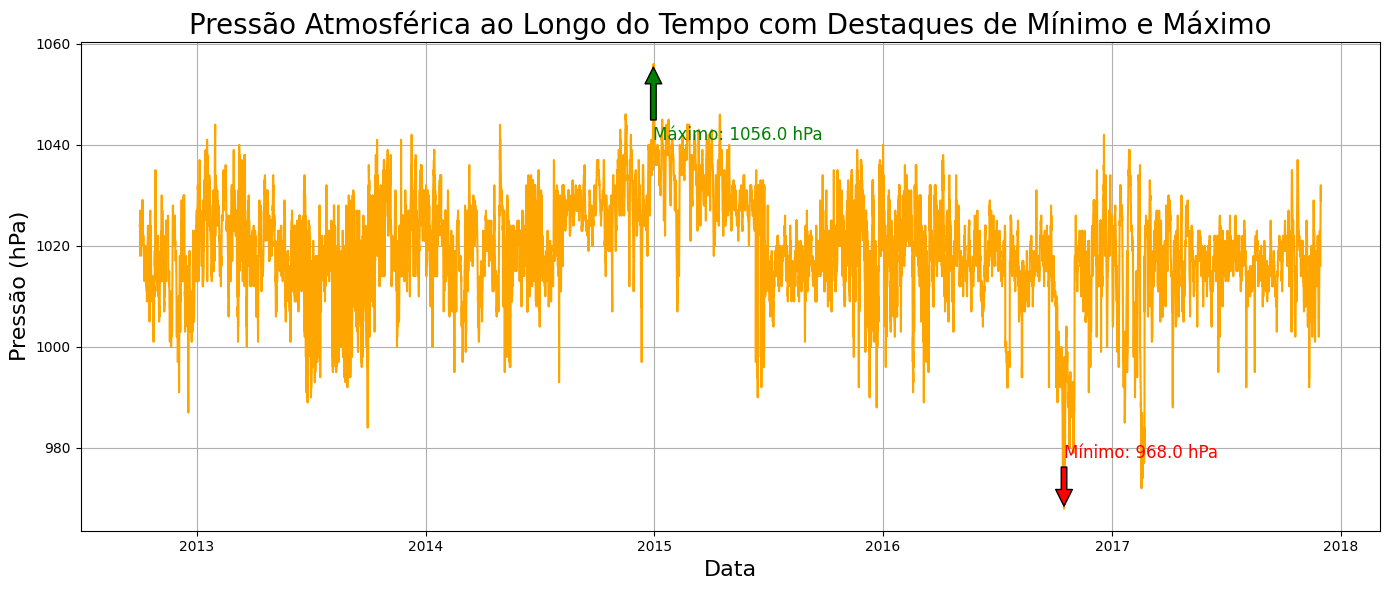

In [23]:
# Exercício E:
# Realizar anotações no gráfico de pressão

import matplotlib.pyplot as plt

# Garantir que a coluna 'data' está em datetime
df['data'] = pd.to_datetime(df['data'], errors='coerce')

# Localizar os índices dos valores mínimo e máximo
idx_min = df['pressão'].idxmin()
idx_max = df['pressão'].idxmax()

# Plotar o gráfico
plt.figure(figsize=(14, 6))
plt.plot(df['data'], df['pressão'], color='orange', linewidth=1.5)
plt.title('Pressão Atmosférica ao Longo do Tempo com Destaques de Mínimo e Máximo', fontsize=20)
plt.xlabel('Data', fontsize=16)
plt.ylabel('Pressão (hPa)', fontsize=16)
plt.grid(True)

# Anotação do valor mínimo
plt.annotate(f'Mínimo: {df["pressão"][idx_min]:.1f} hPa',
             xy=(df['data'][idx_min], df['pressão'][idx_min]),
             xytext=(df['data'][idx_min], df['pressão'][idx_min] + 10),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

# Anotação do valor máximo
plt.annotate(f'Máximo: {df["pressão"][idx_max]:.1f} hPa',
             xy=(df['data'][idx_max], df['pressão'][idx_max]),
             xytext=(df['data'][idx_max], df['pressão'][idx_max] - 15),
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=12, color='green')

plt.tight_layout()
plt.show()
